In [1]:
# You've since been given access to the company's complete recordset of rides. This contains 
# information about every active driver and historic ride, including details like city, driver 
# count, individual fares, and city type.

# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key 
# variables:
# 
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [3]:
# Import and Read csv file
city_data = "/Users/kh/Desktop/BOOTCAMP/Week5_Matplotlib/Homework/raw_data/city_data.csv"
ride_data = "/Users/kh/Desktop/BOOTCAMP/Week5_Matplotlib/Homework/raw_data/ride_data.csv"


city_data_pd = pd.read_csv(city_data)
ride_data_pd = pd.read_csv(ride_data)

In [4]:
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_data_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Average Fare ($) Per City

avg_ride = ride_data_pd.groupby("city")["fare"].mean()
# ride_data_pd.dtypes
# type(avg_ride)
avg_ride.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [7]:
# THROW AWAY COMMANDS

# ride_loc = ride_data_pd.loc[:,["city", "date", "fare"]]
# ride_loc["fare"] = pd.to_numeric(ride_loc["fare"], downcast= 'integer')
# df.groupby('Company Name').agg({'Amount': ['sum','count']})

# most_pop_item_final["Total Purchase Value"] = pd.to_numeric(most_pop_item_final["Total Purchase Value"])


# total_item_purchase = item_data.groupby(["Item ID", "Item Name"]).sum()["Price"].rename("Total Purchase Value")
# df.groupby(['name', 'title', 'id'], as_index=False).sum()

# avg_ride = ride_data_pd.groupby(["city"]).agg({"fare": ["mean"]})

# item_data = hero.loc[:,["Item ID", "Item Name", "Price"]]
# ride_loc = ride_data_pd.loc[:,["city", "date", "fare"]]
# avg_ride = ride_loc.groupby(["city", "fare"])

# ride_data_pd["fare"] = pd.to_numeric(ride_data_pd["fare"], downcast='integer')
# total_ride_sum = ride_data_pd.groupby(["city"]).agg({"fare": ["sum"]})
# total_ride_count = ride_data_pd.groupby(["city"]).agg({"fare": ["count"]})

# ride_data_pd.add(total_ride, axis='columns', level=None, fill_value=None)
# In [4]: frames = [df1, df2, df3]
# In [5]: result = pd.concat(frames)
# pd.merge(df_new, df_n, on='subject_id')
# test = pd.concat([avg_ride, total_ride], axis=1)

# # all_data = pd.merge(test, city_loc, how='outer', on='city')
# # all_data = pd.concat([test, city_type], axis=1)
# all_data


In [8]:
# Total Number of Rides Per City

# to put in a new dataframe, it has to be a panda series, list, or a numpy array

total_ride_sum = ride_data_pd.groupby("city")["fare"].sum()
total_ride_count = ride_data_pd.groupby("city")["fare"].count()

In [9]:
New_ride = pd.DataFrame({"Total Fares Earned": total_ride_sum, 
                         "Total Number of Rides": total_ride_count,
                         "Average Fare": avg_ride
                        })
New_ride.head()

,Average Fare,Total Fares Earned,Total Number of Rides
city,,,
Alvarezhaven,23.928710,741.79,31
Alyssaberg,20.609615,535.85,26
Anitamouth,37.315556,335.84,9
Antoniomouth,23.625000,519.75,22
Aprilchester,21.981579,417.65,19


In [10]:
#Merging two dataframes together
        # pd.merge(df_new, df_n, on='subject_id')
# Reset the index moved the "city" into a column 
reset = New_ride.reset_index()
reset.head()

,city,Average Fare,Total Fares Earned,Total Number of Rides
0,Alvarezhaven,23.928710,741.79,31
1,Alyssaberg,20.609615,535.85,26
2,Anitamouth,37.315556,335.84,9
3,Antoniomouth,23.625000,519.75,22
4,Aprilchester,21.981579,417.65,19


In [11]:
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [12]:
all_data = pd.merge(reset, city_data_pd, on="city", how="left")
#Is left appropriate in this case???
# all_data["Average Fare"] = all_data["Average Fare"].map("{:.2f}".format)
# all_data["Total Fares Earned"] = all_data["Total Fares Earned"].map("{:.2f}".format)

all_data.dtypes

city                      object
Average Fare             float64
Total Fares Earned       float64
Total Number of Rides      int64
driver_count               int64
type                      object
dtype: object

In [13]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key 
# variables:
# 
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# # Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)

# # Set a Title and labels
# plt.title("Average Rain per State")
# plt.xlabel("State")
# plt.ylabel("Average Amount of Rainfall in Inches")

# # Save our graph and show the grap
# plt.tight_layout()
# plt.savefig("avg_state_rain.png")
# plt.show()
all_data.head()

,city,Average Fare,Total Fares Earned,Total Number of Rides,driver_count,type
0,Alvarezhaven,23.928710,741.79,31,21,Urban
1,Alyssaberg,20.609615,535.85,26,67,Urban
2,Anitamouth,37.315556,335.84,9,16,Suburban
3,Antoniomouth,23.625000,519.75,22,21,Urban
4,Aprilchester,21.981579,417.65,19,49,Urban


In [14]:
# def f(a, b):
#     return a + b

# lambda a, b: a + b

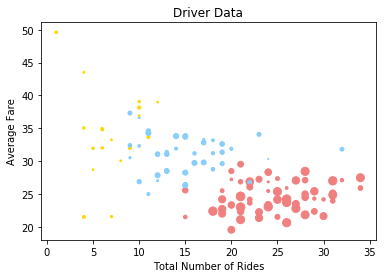

In [15]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key 
# variables:
# 
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)
colors = {"Rural":"gold", "Suburban":"lightskyblue", "Urban":"lightcoral"}

plot = plt.scatter(x=all_data["Total Number of Rides"], y=all_data["Average Fare"], c=all_data["type"].apply(lambda x: colors[x]), s=all_data["driver_count"])
#i'm going to have to do three different scatter plots per city types

# Set a Title and labels
plt.title("Driver Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
unique_types=set(all_data["type"])
# plt.legend(unique_types, ncol=3)

In [16]:
# sb.set()
all_data.head()

,city,Average Fare,Total Fares Earned,Total Number of Rides,driver_count,type
0,Alvarezhaven,23.928710,741.79,31,21,Urban
1,Alyssaberg,20.609615,535.85,26,67,Urban
2,Anitamouth,37.315556,335.84,9,16,Suburban
3,Antoniomouth,23.625000,519.75,22,21,Urban
4,Aprilchester,21.981579,417.65,19,49,Urban


In [17]:
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [18]:
# fares = all_data["Total Fares Earned"]
cities_sum = all_data.groupby("type")["Total Fares Earned"].sum() #sum of all fares per citie
cities_count = all_data.groupby("type")["Total Fares Earned"].count() # count of all types per city
total_cities = cities_sum.sum() # sum of all fares 
labels = cities_sum/total_cities
# color = {"gold", "lightskyblue", "lightcoral"}
# explode = [0.1, 0, 0]


# plt.pie(cities_, labels=, colors=color, autopct="%1.1f%%", shadow=True, startangle=140)
labels

type
Rural       0.065798
Suburban    0.314458
Urban       0.619745
Name: Total Fares Earned, dtype: float64